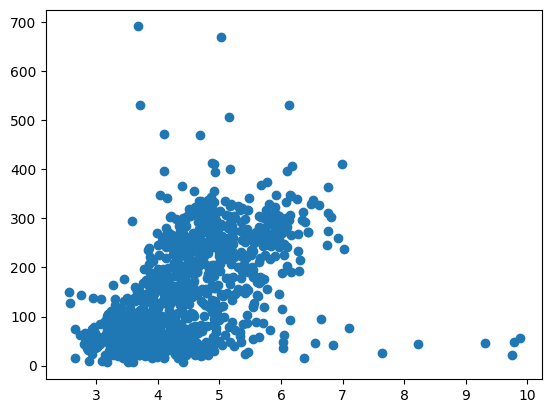

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

k1=2.5
k2=2.5
k3=1.5
vmax = 3600*3*0.014/(2*0.21)

df = pd.read_csv('/home/ipausers/hamzaoui/Documents/Data/Plot/Growth speed vs tip/length_growth_speed.csv')
radius = df.iloc[:,1]
growth_speed = df.iloc[:,2]
plt.scatter(radius, growth_speed)

In [128]:
0.42*0.08/3

0.0112

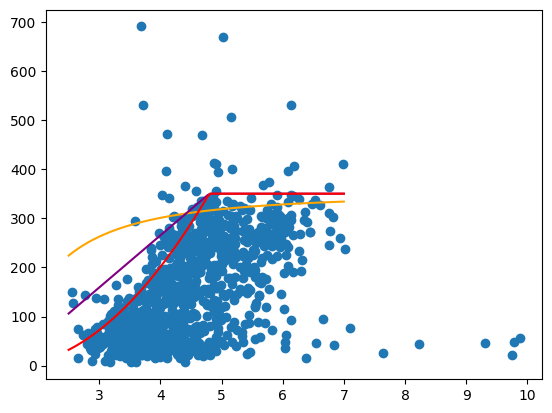

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

k1=1.5
k2=1.5
k3=1.5
vmax = 350

df = pd.read_csv('/home/ipausers/hamzaoui/Documents/Data/Plot/Growth speed vs tip/length_growth_speed.csv')
radius = df.iloc[:,1]
growth_speed = df.iloc[:,2]
plt.scatter(radius, growth_speed)
x = np.linspace(2.5, 7, 100)
y1 = vmax*(1-((k1**2)/(x**2)))
y2 = vmax*(x-k2)/(4.8-k2)
y3 = vmax*((x-k3)**2)/((4.8-k3)**2)
plt.plot(x, np.minimum(y1, vmax), color='orange')
plt.plot(x, np.minimum(y2, vmax), color='purple')
plt.plot(x, np.minimum(y3, vmax), color='red')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

k1=1.5
k2=1.5
k3=1.5
vmax = 350

df = pd.read_csv('/home/ipausers/hamzaoui/Documents/Data/Plot/Growth speed vs tip/length_growth_speed.csv')
radius = df.iloc[:,1]
growth_speed = df.iloc[:,2]
plt.scatter(radius, growth_speed)
x = np.linspace(2.5, 7, 100)
y1 = vmax*(1-((k1**2)/(x**2)))
y2 = vmax*(x-k2)/(4.8-k2)
y3 = vmax*((x-k3)**2)/((4.8-k3)**2)
plt.plot(x, np.minimum(y1, vmax), color='orange')
plt.plot(x, np.minimum(y2, vmax), color='purple')
plt.plot(x, np.minimum(y3, vmax), color='red')

max : 0.05007404733885343
Q90 : 0.01622788090748727


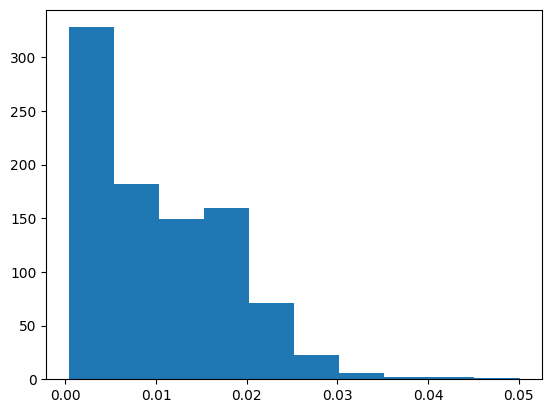

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/home/ipausers/hamzaoui/Documents/Data/Plot/Growth speed vs tip/surface_and_volume_growth_speed.csv')
radius = df.iloc[:,1]
volume_growth = df.iloc[:,3]
rho = 0.42*volume_growth/(3600*np.pi*3*2*(2*0.9*radius-2))
plt.hist(rho)
print('max :', np.max(rho))
print('Q90 :', np.quantile(rho, 0.750))

In [37]:
2.1*3.7*1.09*4*6.022/18

11.333805466666668

In [33]:
df.iloc[121]

Unnamed: 0                                  121.000000
radius (um)                                   3.676455
surface_growth_speed (um²/h) (2pi*r*l)    17733.567579
volume_growth_speed (um³/h) (pi*r²*l)     37358.124090
Name: 121, dtype: float64

In [43]:
np.mean(df.iloc[:,2])/3600

0.04377564877092464

In [44]:
0.04377564877092464*42/(79*3)

0.007757709908771455

0.007169550155501262 0.007757709908771455


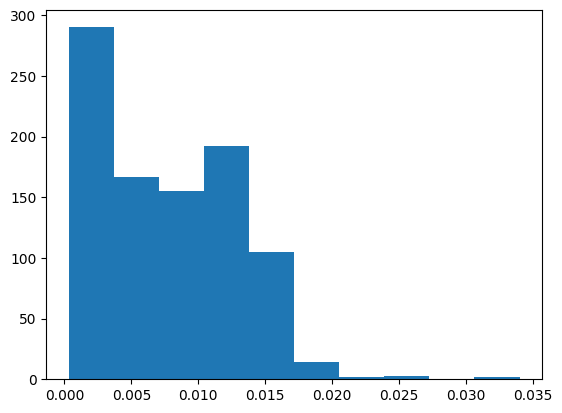

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/home/ipausers/hamzaoui/Documents/Data/Plot/Growth speed vs tip/length_growth_speed.csv')
radius = df.iloc[:,1]
volume_growth = df.iloc[:,2]*radius*radius*np.pi
rho = 0.42*volume_growth/(3600*np.pi*0.79*radius*radius*3)
plt.hist(rho)
print(np.median(rho), np.mean(rho))

max : 0.046609659372855446
Q90 : 0.021364532573344575


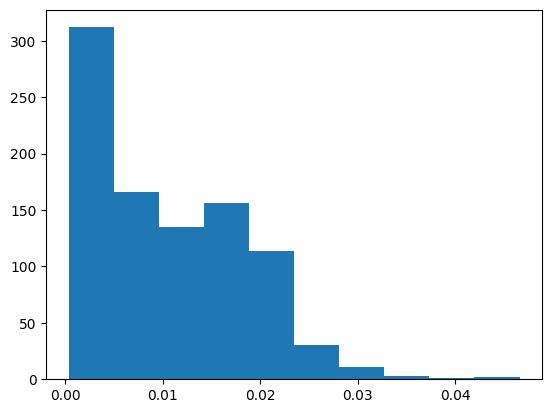

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/home/ipausers/hamzaoui/Documents/Data/Plot/Growth speed vs tip/length_growth_speed.csv')
radius = df.iloc[:,1]
volume_growth = df.iloc[:,2]*radius*radius*np.pi
rho = 0.42*volume_growth/(3600*np.pi*3*2*(2*0.9*radius-2))
plt.hist(rho)
print('max :', np.max(rho))
print('Q90 :', np.quantile(rho, 0.9))

max : 0.0849528816086052
Q90 : 0.03657805310780052


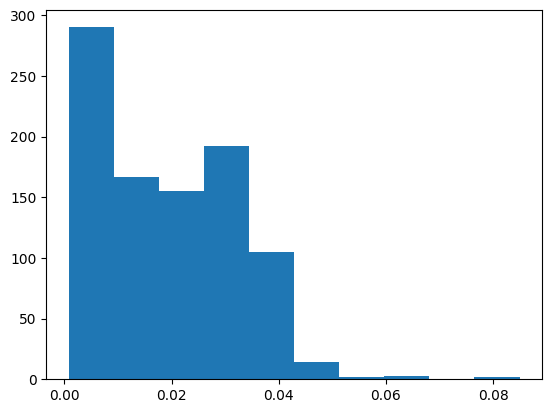

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/home/ipausers/hamzaoui/Documents/Data/Plot/Growth speed vs tip/length_growth_speed.csv')
radius = df.iloc[:,1]
volume_growth = df.iloc[:,2]*radius*radius*np.pi
rho = 0.42*volume_growth/(3600*np.pi*3*0.79*radius*radius*0.4)
plt.hist(rho)
print('max :', np.max(rho))
print('Q90 :', np.quantile(rho, 0.9))

# 0. Import Lib

In [1]:
import networkx as nx
import numpy as np
from sthype import SpatialGraph
from sthype.graph_functions import spatial_temporal_graph_from_spatial_graphs
from sthype.plot import plot_spatial_temporal_graph, plot_spatial_temporal_graph_node, plot_spatial_graph, plot_spatial_temporal_graph_hyperedge
import matplotlib.pyplot as plt
import os
import pickle

%load_ext autoreload
%autoreload 2

# 1. Import Graph

In [2]:
graphs = []

str_directory = "/home/ipausers/hamzaoui/Documents/Data/Graphs/482_20230908"
directory = os.fsencode(str_directory)

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    file_path = os.path.join(str_directory, filename)
    if filename.endswith('pickle'):
        graphs.append((filename, pickle.load(open(file_path, 'rb'))))

graphs.sort()
graphs = [graph for _, graph in graphs]
graphs

# 2. Set up stg

In [3]:
spatial_graphs = [SpatialGraph(graph) for graph in graphs]
spatial_graph = spatial_graphs[-1]
sg = spatial_graph

In [4]:
spatial_temporal_graph = spatial_temporal_graph_from_spatial_graphs(spatial_graphs, np.arange(len(spatial_graphs)), verbose=1)
stg = spatial_temporal_graph

Segmentation
Edge Activation
Comparing with graph 20
Comparing with graph 19
Comparing with graph 18
Comparing with graph 17
Comparing with graph 16
Comparing with graph 15
Comparing with graph 14
Comparing with graph 13
Comparing with graph 12
Comparing with graph 11
Comparing with graph 10
Comparing with graph 9
Comparing with graph 8
Comparing with graph 7
Comparing with graph 6
Comparing with graph 5
Comparing with graph 4
Comparing with graph 3
Comparing with graph 2
Comparing with graph 1
Comparing with graph 0


# 3. Analysis

In [ ]:
g_t = []
for i in range(21):
    g_t.append(stg.get_graph_at(i))
widths_t = []

hyperedge_e = {}
for u, v, ed in g_t[-1].edges(data=True):
    hyperedge_e.setdefault(ed["hyperedge"], []).append((u, v, ed['activation'], LineString(ed['pixels']).length))

In [ ]:
tips = []
tips_light = []
growth_l = []
growth_s = []
growth_v = []
for edges in hyperedge_e.values():
    for i in range(1, 20):
        widths = [g_t[i+1][u][v]['attributes'].get('width', [np.nan]) for u, v, a, l in edges if a==i]
        widths = [w for ws in widths for w in ws]
        width = np.median(widths)
        if np.isnan(width) or width<=2:
            continue
        lengths = [l for u, v, a, l in edges if a==i+1]
        ss = [np.pi*l*np.median(g_t[a][u][v]['attributes'].get('width', np.nan)) for u, v, a, l in edges if a==i+1]
        vs = [np.pi*l*np.median(g_t[a][u][v]['attributes'].get('width', np.nan))*np.median(g_t[a][u][v]['attributes'].get('width', np.nan))/4 for u, v, a, l in edges if a==i+1]
        length = np.sum(lengths)
        if length==0:
            continue
        tips.append(width)
        growth_l.append(length)
        if np.isnan(ss).any():
            continue
        tips_light.append(width)
        s = np.sum(ss)
        v = np.sum(vs)
        growth_s.append(s)
        growth_v.append(v)